# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

pd.set_option('display.max_columns', None)

# Загрузим данные

In [2]:
arxiv = pd.read_csv('../data/prepared_arxiv.csv', usecols=['id', 'authors', 'categories', 'license', 'number_of_versions', 'number_of_authors', 'number_of_categories',
                                                            'groups', 'publication_year', 'last_update_year', 'publication_month', 'last_update_month'])

print(arxiv.shape)
arxiv.head(3)

C:\Users\Pavel Vasiliev\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
(1897853, 12)


,id,authors,categories,license,number_of_versions,number_of_authors,number_of_categories,groups,publication_year,last_update_year,publication_month,last_update_month
0,cond-mat/0101160,"['Rybin A. V.', 'Varzugin G. G.', 'Timonen J.']",cond-mat,NaN,2,3,1,cond-mat,2001,2001,1,1
1,astro-ph/0109371,"['Boer M.', 'Thiebaut C.', 'Klotz A.', 'Buchho...",Astrophysics,NaN,1,7,1,Astrophysics,2001,2001,9,9
2,astro-ph/9709059,"['Williams Liliya L. R.', 'Schechter Paul L.']",Astrophysics,NaN,1,2,1,Astrophysics,1997,1997,9,9


# Визуализируем данные
## Отобразим количество статей по месяцам

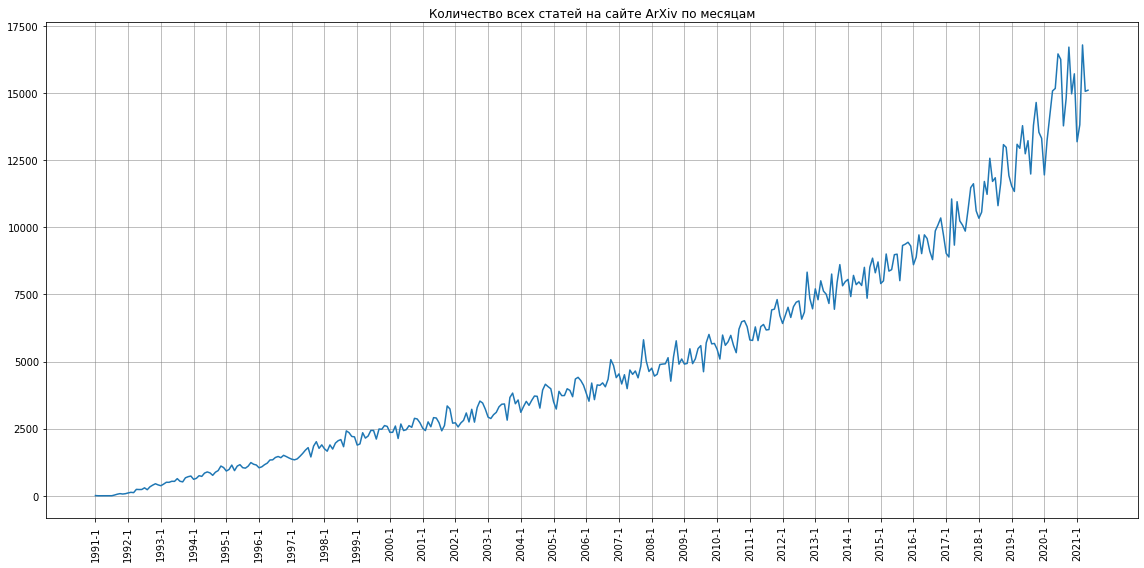

In [3]:
arxiv_sample = arxiv.groupby(["publication_year", "publication_month"]).agg({"id": 'count'}).reset_index()
arxiv_sample["tot"] = arxiv_sample["id"].cumsum()

arxiv_sample = arxiv_sample.query("publication_year > 1990 and ( publication_year != 2021 or publication_month < 6)")
arxiv_sample["month"] =  arxiv_sample["publication_year"].astype(str) + "-" + arxiv_sample["publication_month"].astype(str)  


fig = plt.figure(figsize=(16,8))

plt.title("Количество всех статей на сайте ArXiv по месяцам")
plt.plot(arxiv_sample["month"], arxiv_sample["id"])
plt.xticks(np.arange(0, len(arxiv_sample), 12.0))
plt.tick_params('x',labelrotation=90)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
# освободим память
del arxiv_sample

## Визуализируем плотность количества статей по месяцам в каждой тематике

In [35]:
arxiv_sample = arxiv.groupby(['publication_year', 'categories']).agg({"id": 'count'}).reset_index()

In [34]:
arxiv_sample["tot"] = arxiv_sample["id"].cumsum()

arxiv_sample = arxiv_sample.query("publication_year > 1990 and ( publication_year != 2021)")
arxiv_sample["publication_year"] = arxiv_sample["publication_year"].astype(str).values 

paper_category_1 = 'Machine Learning'
paper_category_2 = 'Statistical'
paper_category_3 = 'Mathematical'
paper_category_4 = 'Probability'

arxiv_sample_topic_1 = arxiv_sample[arxiv_sample['categories'] == paper_category_1].reset_index(drop=True)
arxiv_sample_topic_2 = arxiv_sample[arxiv_sample['categories'].str.contains(paper_category_2)].reset_index(drop=True)
arxiv_sample_topic_3 = arxiv_sample[arxiv_sample['categories'].str.contains(paper_category_3)].reset_index(drop=True)
arxiv_sample_topic_4 = arxiv_sample[arxiv_sample['categories'] == paper_category_4].reset_index(drop=True)

fig = plt.figure(figsize=(16,8))

plt.title("Количество статей на смежные темы на сайте ArXiv по годам")
plt.plot(arxiv_sample_topic_1["publication_year"], arxiv_sample_topic_1["id"])
plt.plot(arxiv_sample_topic_2["publication_year"], arxiv_sample_topic_2["id"])
plt.plot(arxiv_sample_topic_3["publication_year"], arxiv_sample_topic_3["id"])
plt.plot(arxiv_sample_topic_4["publication_year"], arxiv_sample_topic_4["id"])
plt.xticks(np.arange(0, len(arxiv_sample), 1.0))
plt.tick_params('x',labelrotation=90)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

TypeError: '>' not supported between instances of 'str' and 'int'